In [1]:
# import libraries
from keras.models import model_from_json
import numpy as np
import cv2

from keras.utils import to_categorical

%matplotlib inline
import matplotlib.pyplot as plt

2023-04-30 14:40:55.162805: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load json and create model
json_file = open('/Users/avikun/Documents/Skin-Cancer-Detector/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
print("Loaded model from disk")

Loaded model from disk


2023-04-30 14:40:57.459627: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# load weights into new model
loaded_model.load_weights("/Users/avikun/Documents/Skin-Cancer-Detector/model.h5")
print("Loaded model from disk")

Loaded model from disk


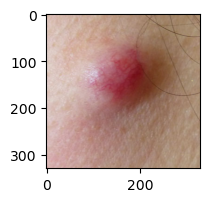

In [4]:
loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

def load_image(path):
    image = cv2.imread(path)
    return image
img = load_image('/Users/avikun/Documents/Skin-Cancer-Detector/Dataset/test/benign/9.jpg')

fig=plt.figure(figsize=(12, 2))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

img = cv2.resize(img, (224, 224))
img = img.reshape((1,224, 224, 3))

In [5]:
class_labels = {0: 'benign', 1: 'malignant'}

predictions = loaded_model.predict(img)
prediction_class = class_labels[np.argmax(predictions[0])]
prediction_accuracy = np.max(predictions[0])

prediction_accuracy_percentage = prediction_accuracy * 100

print("Prediction class: ", prediction_class)
print("Prediction accuracy: {:.2f}%".format(prediction_accuracy_percentage))

1/1 [==============================] - 0s 87ms/step
Prediction class:  benign
Prediction accuracy: 99.93%
